((50,1) * (10,1).T) = (50,10) (A)

((50,1) * (10,1).T) = (50,10) (B)

((50,1) * (10,1).T) = (50,10) (C)


A + B + C = 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

def points(a,b,c):
  return (a*(x**2))+(b*x)+c

def randomGenerate(aMax,aMin, bMax, bMin, cMax,cMin, total):
  a = np.random.uniform(low=aMin, high=aMax, size=(total,1))
  b = np.random.uniform(low=bMin, high=bMax, size=(total,1))
  c = np.random.uniform(low=cMin, high=cMax, size=(total,1))
  return a, b, c

def predictions(a,b, c, x):

  a1 = np.dot(a, (x**2).T)
  b1 = np.dot(b, x.T)
  c1 = np.dot(c, x.T)

  return a1 + b1 + c 


def cost(preds, real):

  errors = []

  for i in range(preds.shape[0]):
    errors.append(np.sum((real - preds[i, :])**2)*(1/real.shape[0]))

  return np.array(errors), np.mean(errors)


def filter(errors, aGen, bGen, cGen, sensitivity):

  bound = np.min(errors)+ (np.min(errors)*sensitivity)

  return np.min(aGen[np.where(errors <= bound)]), np.max(aGen[np.where(errors <= bound)]), np.min(bGen[np.where(errors <= bound)]), np.max(bGen[np.where(errors <= bound)]), np.min(cGen[np.where(errors <= bound)]), np.max(cGen[np.where(errors <= bound)])



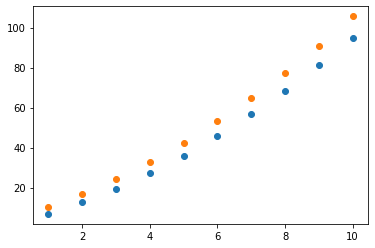

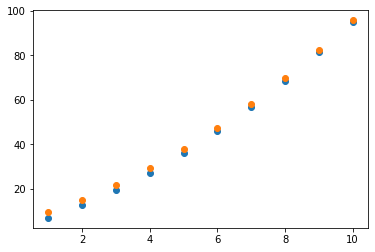

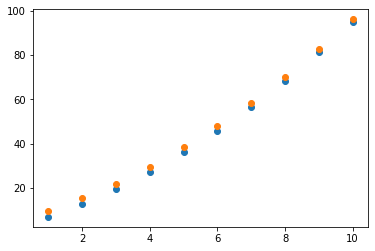

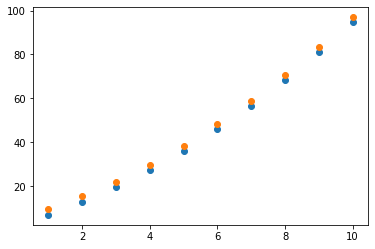

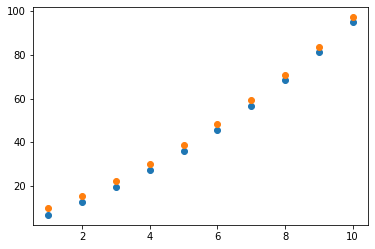

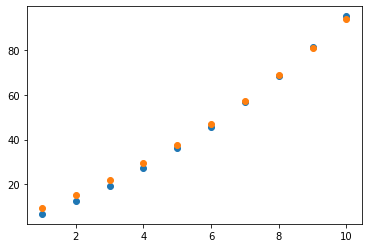

In [22]:
# Function that is trying to be estimated for
a = 0.5

b = 4.3

c = 2

x = np.array([1,2,3,4,5,6,7,8,9,10]).reshape((10,1))

real = points(a,b,c)

#Hyperparameters:

aMin, aMax, bMin, bMax, cMin, cMax = 0,1,0,10,0,10

sensitivity = 2

numEpochs = 30

#Algorithm
costPlot = [] 

for epoch in range(0,30):

  aGen, bGen, cGen = randomGenerate(aMin, aMax, bMin, bMax, cMin, cMax, 50)

  preds = predictions(aGen,bGen, cGen, x)

  errors, plotError = cost(preds, real)

  aMin, aMax, bMin, bMax, cMin, cMax = filter(errors, aGen, bGen, cGen, sensitivity)

  if epoch % 5 == 0:
    plt.figure()
    plt.scatter(x, real)
    plt.scatter(x, points((aMax+aMin)/2, (bMax+bMin)/2, (cMax+cMin)/2))
    plt.plot()

  costPlot.append(plotError)

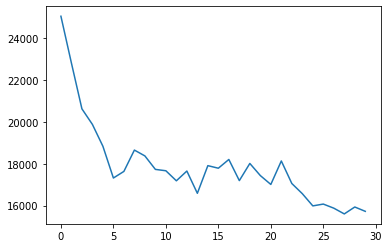

In [23]:
plt.plot(costPlot)

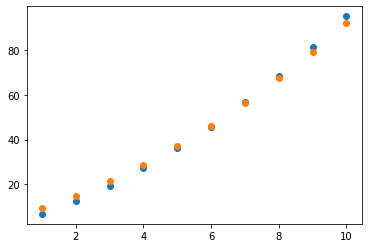

In [24]:
plt.scatter(x, real)
plt.scatter(x, points((aMax+aMin)/2, (bMax+bMin)/2, (cMax+cMin)/2))

In [ ]:
#Try to do this for a harder quartic function and compare the cost on the epochs and time of convergence with gradient descent after implementing it (use the vectorized approach)

In [4]:
a = 0.5

b = 4.3

c = 2

x = np.array([1,2,3,4,5,6,7,8,9,10]).reshape((10,1))

real = points(a,b,c)

print(x)
print(real)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[ 6.8]
 [12.6]
 [19.4]
 [27.2]
 [36. ]
 [45.8]
 [56.6]
 [68.4]
 [81.2]
 [95. ]]


In [ ]:
#Gradient Descent:
import numpy as np

def mse(x, y, theta):
  h = 